# Prevendo a Inadimpência de Clientes com MachineLearning em R
---

### Definição do Problema:
* Prever quais clientes poderão deixar de pagar a fatura do cartão de crédito no próximo mês.
* A idéia é fornecer insights para que a empresa possa tomar ações pro-ativas como: limitar as compras feitas com o cartão ou até não aprovar compras acima de um determinado limite.
* O setor de cobranças será afonte de dados do histórico dos clientes, entre os que pagam e que não pagam as faturas.
* O trabalho é criar um modelo de Machine Learning para prever a inadimolência dos clientes do cartão de crédito.
> Dataset: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11: History of past payment'. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.



In [1]:
install.packages("Amelia")
install.packages("caret")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("reshape")
install.packages("randomForest")
install.packages("e1071")

also installing the dependency 'RcppArmadillo'



package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'Amelia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\RtmpGaavHl\downloaded_packages


also installing the dependencies 'pillar', 'glue', 'tibble', 'ellipsis', 'dplyr', 'vctrs', 'cpp11', 'generics', 'lifecycle', 'rlang', 'tidyr', 'tidyselect', 'ModelMetrics', 'recipes', 'pROC'




  There is a binary version available but the source version is later:
        binary source needs_compilation
recipes 0.1.15 0.1.16             FALSE

package 'pillar' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'ellipsis' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked
package 'cpp11' successfully unpacked and MD5 sums checked
package 'generics' successfully unpacked and MD5 sums checked
package 'lifecycle' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'tidyr' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'ModelMetrics' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked

installing the source package 'recipes'

also installing the dependency 'isoband'



package 'isoband' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\RtmpGaavHl\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\RtmpGaavHl\downloaded_packages
package 'reshape' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\RtmpGaavHl\downloaded_packages
package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\RtmpGaavHl\downloaded_packages


also installing the dependency 'proxy'



package 'proxy' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\RtmpGaavHl\downloaded_packages


In [1]:
library(Amelia)
library(ggplot2)
library(caret)
library(reshape)
library(randomForest)
library(dplyr)
library(e1071)


Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'reshape' was built under R version 3.6.3"Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:randomForest':

    combine

The following object is masked from 'package:reshape':

    rename

The following objects are 

In [2]:
data = read.csv("dataset/dataset.csv")
head(data)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [3]:
dim(data)

[1] 30000    25

In [4]:
str(data)

'data.frame':	30000 obs. of  25 variables:
 $ ID                        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ LIMIT_BAL                 : int  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX                       : int  2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION                 : int  2 2 2 2 2 1 1 2 3 3 ...
 $ MARRIAGE                  : int  1 2 2 1 1 2 2 2 1 2 ...
 $ AGE                       : int  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0                     : int  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2                     : int  2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3                     : int  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4                     : int  -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5                     : int  -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6                     : int  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1                 : int  3913 2682 29239 46990 8617 64400 367965 11876 11285 0 ...
 $ BILL_AMT2                 : int  3102 1725 14027 48233 5670 57069 412

In [5]:
summary(data)

       ID          LIMIT_BAL            SEX          EDUCATION    
 Min.   :    1   Min.   :  10000   Min.   :1.000   Min.   :0.000  
 1st Qu.: 7501   1st Qu.:  50000   1st Qu.:1.000   1st Qu.:1.000  
 Median :15000   Median : 140000   Median :2.000   Median :2.000  
 Mean   :15000   Mean   : 167484   Mean   :1.604   Mean   :1.853  
 3rd Qu.:22500   3rd Qu.: 240000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :30000   Max.   :1000000   Max.   :2.000   Max.   :6.000  
    MARRIAGE          AGE            PAY_0             PAY_2        
 Min.   :0.000   Min.   :21.00   Min.   :-2.0000   Min.   :-2.0000  
 1st Qu.:1.000   1st Qu.:28.00   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Median :2.000   Median :34.00   Median : 0.0000   Median : 0.0000  
 Mean   :1.552   Mean   :35.49   Mean   :-0.0167   Mean   :-0.1338  
 3rd Qu.:2.000   3rd Qu.:41.00   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :3.000   Max.   :79.00   Max.   : 8.0000   Max.   : 8.0000  
     PAY_3             PAY_4             PAY_5  

### Análise exploratória,limpeza e transformação
---

In [6]:
# Removendo ID
data$ID = NULL
head(data,2)

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [7]:
# Renomear a coluna de classe
colnames(data)[24] = 'inadimplente'
colnames(data)[24]

[1] "inadimplente"

In [8]:
# Verificando valores ausentes
sapply(data, function(x) sum(is.na(x)))

LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE        PAY_0 
           0            0            0            0            0            0 
       PAY_2        PAY_3        PAY_4        PAY_5        PAY_6    BILL_AMT1 
           0            0            0            0            0            0 
   BILL_AMT2    BILL_AMT3    BILL_AMT4    BILL_AMT5    BILL_AMT6     PAY_AMT1 
           0            0            0            0            0            0 
    PAY_AMT2     PAY_AMT3     PAY_AMT4     PAY_AMT5     PAY_AMT6 inadimplente 
           0            0            0            0            0            0

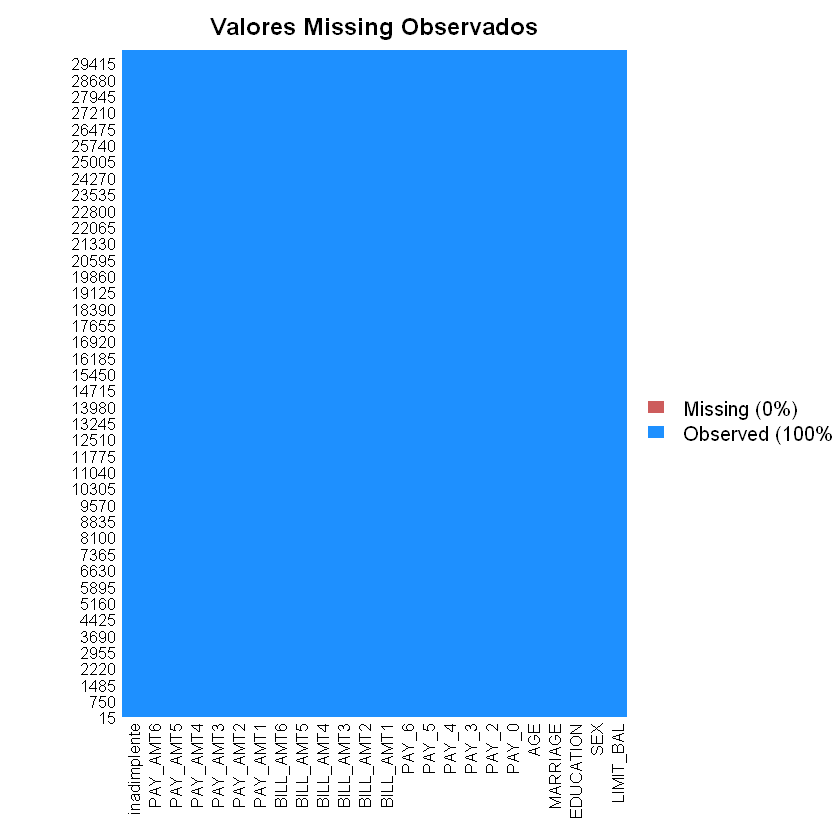

In [9]:
# Valores ausentes com Amelia
missmap(data, main="Valores Missing Observados")
#data = na.omit(data)

In [10]:
# Renomeando colunas categóricas
colnames(data)[2] ='genero'
colnames(data)[3] ='escolaridade'
colnames(data)[4] ='estado_civil'
colnames(data)[5] ='idade'
colnames(data)

[1] "LIMIT_BAL"    "genero"       "escolaridade" "estado_civil" "idade"       
 [6] "PAY_0"        "PAY_2"        "PAY_3"        "PAY_4"        "PAY_5"       
[11] "PAY_6"        "BILL_AMT1"    "BILL_AMT2"    "BILL_AMT3"    "BILL_AMT4"   
[16] "BILL_AMT5"    "BILL_AMT6"    "PAY_AMT1"     "PAY_AMT2"     "PAY_AMT3"    
[21] "PAY_AMT4"     "PAY_AMT5"     "PAY_AMT6"     "inadimplente"

In [11]:
# Conveter variáveis numéricas em fatores (categóricas):
# genero
data$genero = cut(data$genero, c(0,1,2), labels=c('Maculino', 'Feminino'))
summary(data$genero)

Maculino Feminino 
   11888    18112

In [12]:
summary(data$escolaridade)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   1.853   2.000   6.000 

In [13]:
# escolaridade
data$escolaridade = cut(data$escolaridade, c(0,1,2,3,4), labels=c('Pos Graduado', 'Graduado', 'Ensino Médio', 'Outros'))
summary(data$escolaridade)

Pos Graduado     Graduado Ensino Médio       Outros         NA's 
       10585        14030         4917          123          345

In [14]:
# estado_civil
data$estado_civil = cut(data$estado_civil, c(-1,0,1,2,3), labels=c('Desconhecido', 'Casado', 'Solteiro', 'Outros'))
summary(data$estado_civil)

Desconhecido       Casado     Solteiro       Outros 
          54        13659        15964          323

In [15]:
summary(data$idade)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   28.00   34.00   35.49   41.00   79.00 

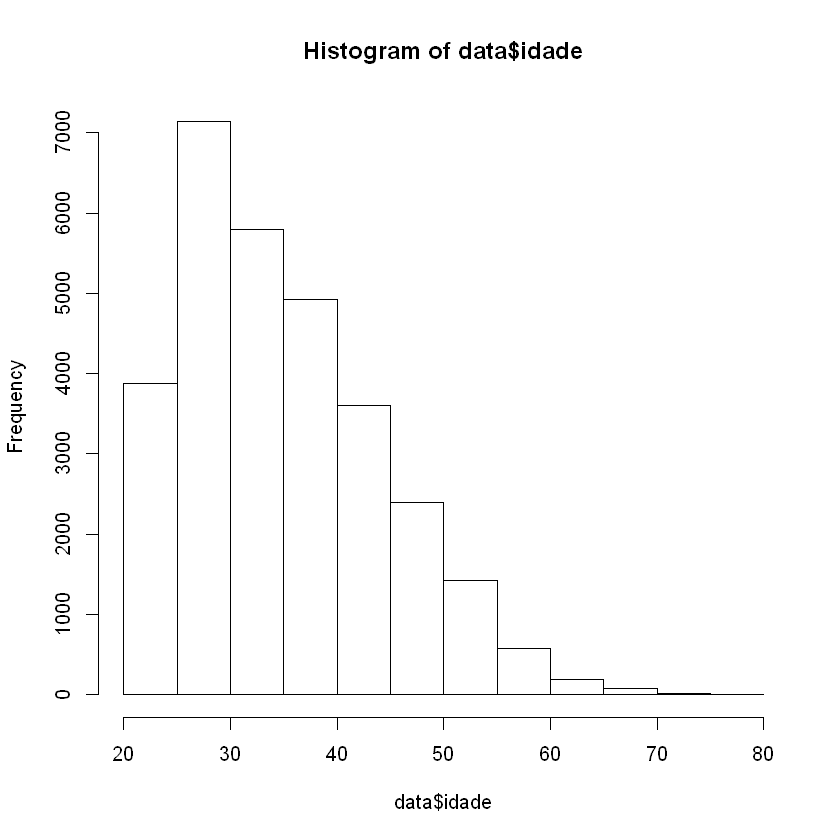

In [16]:
hist(data$idade)

In [17]:
# idade -> faixa etária
data$idade = cut(data$idade, c(0,30,50,100), labels=c('Jovem', 'Adulto','Idoso'))
summary(data$idade)

Jovem Adulto  Idoso 
 11013  16718   2269

In [18]:
head(data,10)

LIMIT_BAL,genero,escolaridade,estado_civil,idade,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,inadimplente
20000,Feminino,Graduado,Casado,Jovem,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
120000,Feminino,Graduado,Solteiro,Jovem,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
90000,Feminino,Graduado,Solteiro,Adulto,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
50000,Feminino,Graduado,Casado,Adulto,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
50000,Maculino,Graduado,Casado,Idoso,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
50000,Maculino,Pos Graduado,Solteiro,Adulto,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
500000,Maculino,Pos Graduado,Solteiro,Jovem,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
100000,Feminino,Graduado,Solteiro,Jovem,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
140000,Feminino,Ensino Médio,Casado,Jovem,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
20000,Maculino,Ensino Médio,Solteiro,Adulto,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [19]:
# Convertendo as demais variáveis por meio de as.factor, não é necessário mudar o valor da variável apenas o tipo 
data$PAY_0 = as.factor(data$PAY_0)
data$PAY_2 = as.factor(data$PAY_2)
data$PAY_3 = as.factor(data$PAY_3)
data$PAY_4 = as.factor(data$PAY_4)
data$PAY_5 = as.factor(data$PAY_5)
data$PAY_6 = as.factor(data$PAY_6)

In [20]:
head(data,10)

LIMIT_BAL,genero,escolaridade,estado_civil,idade,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,inadimplente
20000,Feminino,Graduado,Casado,Jovem,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
120000,Feminino,Graduado,Solteiro,Jovem,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
90000,Feminino,Graduado,Solteiro,Adulto,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
50000,Feminino,Graduado,Casado,Adulto,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
50000,Maculino,Graduado,Casado,Idoso,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
50000,Maculino,Pos Graduado,Solteiro,Adulto,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
500000,Maculino,Pos Graduado,Solteiro,Jovem,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
100000,Feminino,Graduado,Solteiro,Jovem,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
140000,Feminino,Ensino Médio,Casado,Jovem,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
20000,Maculino,Ensino Médio,Solteiro,Adulto,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [21]:
str(data)

'data.frame':	30000 obs. of  24 variables:
 $ LIMIT_BAL   : int  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ genero      : Factor w/ 2 levels "Maculino","Feminino": 2 2 2 2 1 1 1 2 2 1 ...
 $ escolaridade: Factor w/ 4 levels "Pos Graduado",..: 2 2 2 2 2 1 1 2 3 3 ...
 $ estado_civil: Factor w/ 4 levels "Desconhecido",..: 2 3 3 2 2 3 3 3 2 3 ...
 $ idade       : Factor w/ 3 levels "Jovem","Adulto",..: 1 1 2 2 3 2 1 1 1 2 ...
 $ PAY_0       : Factor w/ 11 levels "-2","-1","0",..: 5 2 3 3 2 3 3 3 3 1 ...
 $ PAY_2       : Factor w/ 11 levels "-2","-1","0",..: 5 5 3 3 3 3 3 2 3 1 ...
 $ PAY_3       : Factor w/ 11 levels "-2","-1","0",..: 2 3 3 3 2 3 3 2 5 1 ...
 $ PAY_4       : Factor w/ 11 levels "-2","-1","0",..: 2 3 3 3 3 3 3 3 3 1 ...
 $ PAY_5       : Factor w/ 10 levels "-2","-1","0",..: 1 3 3 3 3 3 3 3 3 2 ...
 $ PAY_6       : Factor w/ 10 levels "-2","-1","0",..: 1 4 3 3 3 3 3 2 3 2 ...
 $ BILL_AMT1   : int  3913 2682 29239 46990 8617 64400 367965 11876 112

In [22]:
sapply(data, function(x) sum(is.na(x)))

LIMIT_BAL       genero escolaridade estado_civil        idade        PAY_0 
           0            0          345            0            0            0 
       PAY_2        PAY_3        PAY_4        PAY_5        PAY_6    BILL_AMT1 
           0            0            0            0            0            0 
   BILL_AMT2    BILL_AMT3    BILL_AMT4    BILL_AMT5    BILL_AMT6     PAY_AMT1 
           0            0            0            0            0            0 
    PAY_AMT2     PAY_AMT3     PAY_AMT4     PAY_AMT5     PAY_AMT6 inadimplente 
           0            0            0            0            0            0

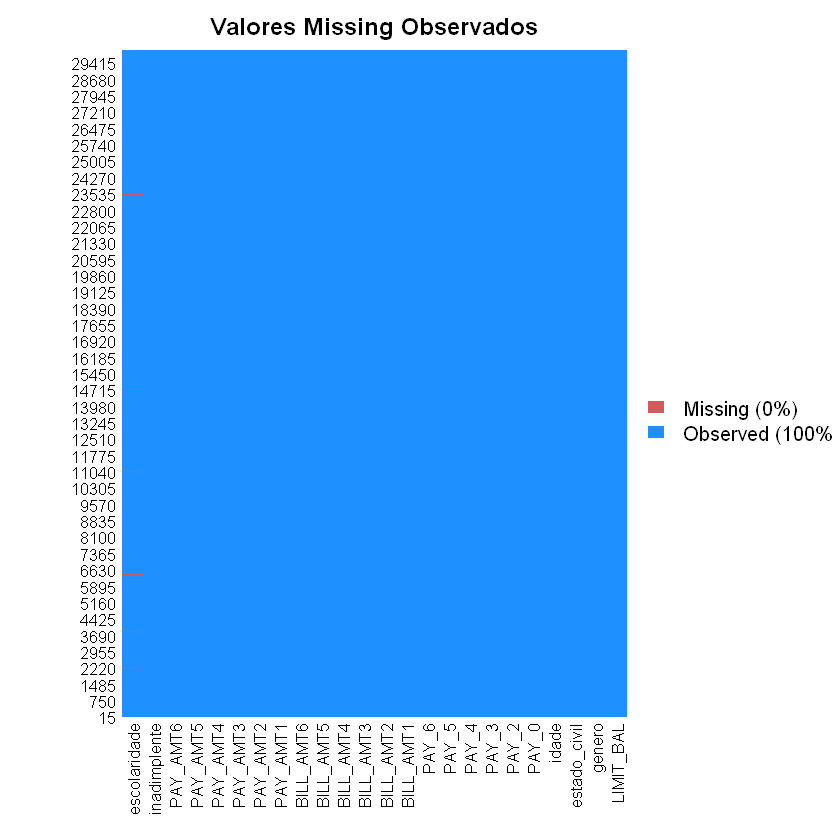

In [23]:
missmap(data, main="Valores Missing Observados")

In [24]:
# Excluindo valores missing
data = na.omit(data)

In [25]:
sapply(data, function(x) sum(is.na(x)))

LIMIT_BAL       genero escolaridade estado_civil        idade        PAY_0 
           0            0            0            0            0            0 
       PAY_2        PAY_3        PAY_4        PAY_5        PAY_6    BILL_AMT1 
           0            0            0            0            0            0 
   BILL_AMT2    BILL_AMT3    BILL_AMT4    BILL_AMT5    BILL_AMT6     PAY_AMT1 
           0            0            0            0            0            0 
    PAY_AMT2     PAY_AMT3     PAY_AMT4     PAY_AMT5     PAY_AMT6 inadimplente 
           0            0            0            0            0            0

In [26]:
dim(data)

[1] 29655    24

In [27]:
# Transformando a variável dependente
str(data$inadimplente)

 int [1:29655] 1 1 0 0 0 0 0 0 0 0 ...


In [28]:
data$inadimplente = as.factor(data$inadimplente)

In [29]:
str(data$inadimplente)

 Factor w/ 2 levels "0","1": 2 2 1 1 1 1 1 1 1 1 ...


In [30]:
table(data$inadimplente)


    0     1 
23045  6610 

In [31]:
prop.table(table(data$inadimplente))


        0         1 
0.7771034 0.2228966 

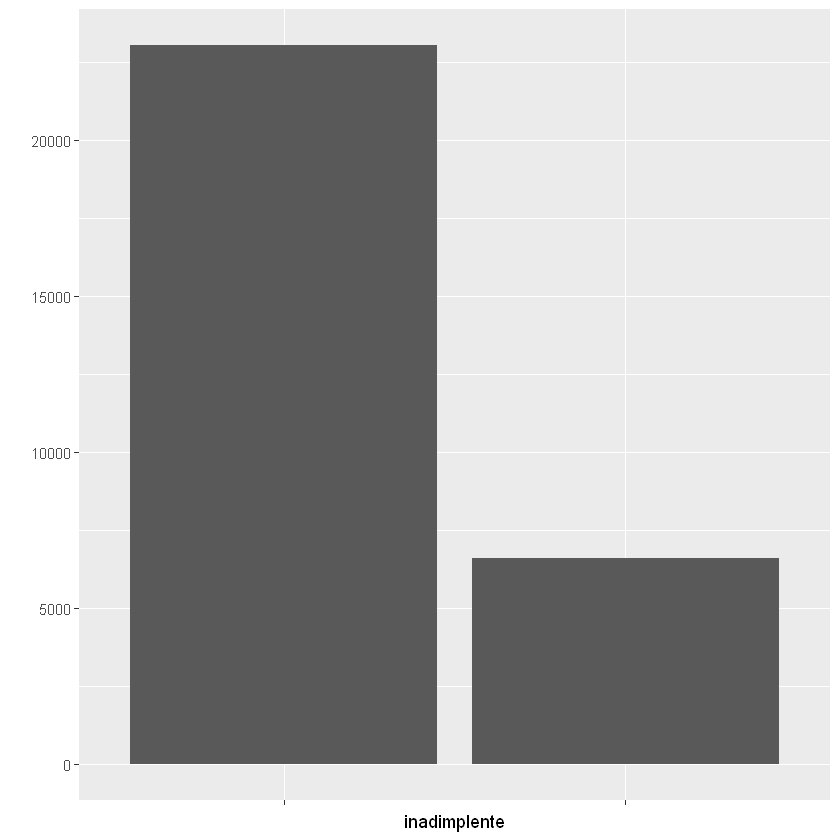

In [32]:
# Plot da distribuição usando ggplot2
qplot(inadimplente, data=data, geom="bar")+
    theme(axis.text.x = element_text(angle=90,hjust=''))

In [33]:
# Amostra estratificada
indice = createDataPartition(data$inadimplente, p=0.75, list=FALSE)
dim(indice)

[1] 22242     1

In [34]:
# Definindo dados de treino
data_treino = data[indice,]
table(data_treino$inadimplente)


    0     1 
17284  4958 

In [35]:
prop.table(table(data_treino$inadimplente))


        0         1 
0.7770884 0.2229116 

In [36]:
# Comparando dados
compara_data = cbind(prop.table(table(data_treino$inadimplente)),
                    prop.table(table(data$inadimplente)))

In [37]:
colnames(compara_data) = c("Treinamento", "Original")
compara_data

,Treinamento,Original
0,0.7770884,0.7771034
1,0.2229116,0.2228966


In [38]:
# Melt Data
melt = melt(compara_data)
melt

X1,X2,value
0,Treinamento,0.7770884
1,Treinamento,0.2229116
0,Original,0.7771034
1,Original,0.2228966


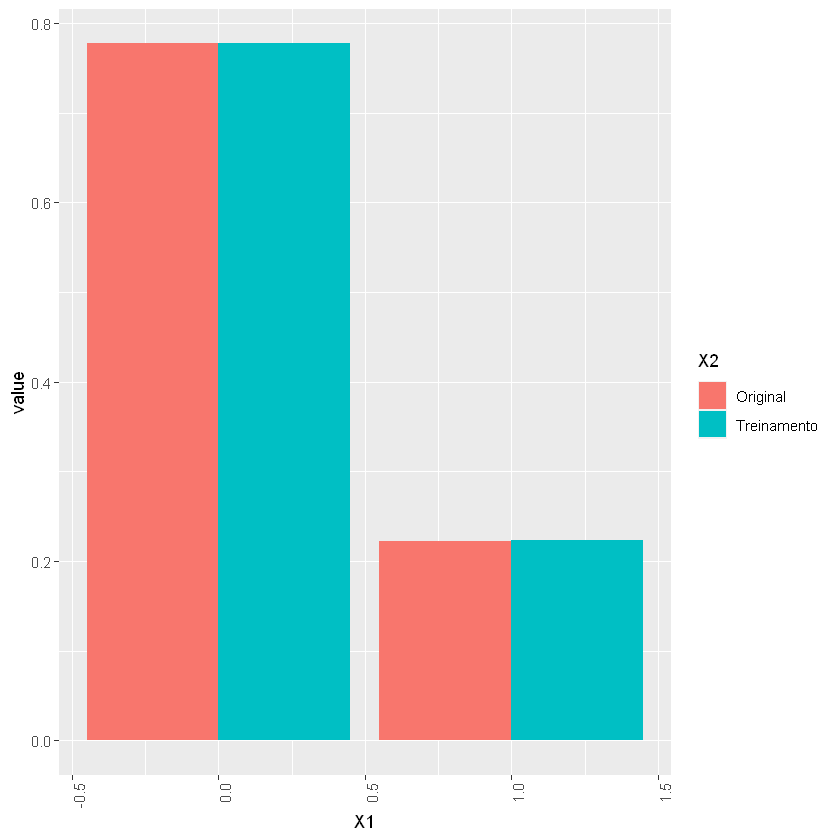

In [39]:
# Gráfico
ggplot(melt, aes(x=X1, y=value))+
    geom_bar(aes(fill=X2), stat="identity", position="dodge")+
    theme(axis.text.x=element_text(angle=90,hjust=1))

In [40]:
data_test = data[-indice,]
dim(data_treino)
dim(data_test)

[1] 22242    24

[1] 7413   24

# Construção dos modelos
---

In [41]:
# Primeira versão: RandomForest (arvore de decisão, classificação)
modelo_v1 = randomForest(inadimplente ~ ., data=data_treino)
modelo_v1 


Call:
 randomForest(formula = inadimplente ~ ., data = data_treino) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 18.23%
Confusion matrix:
      0    1 class.error
0 16317  967   0.0559477
1  3087 1871   0.6226301

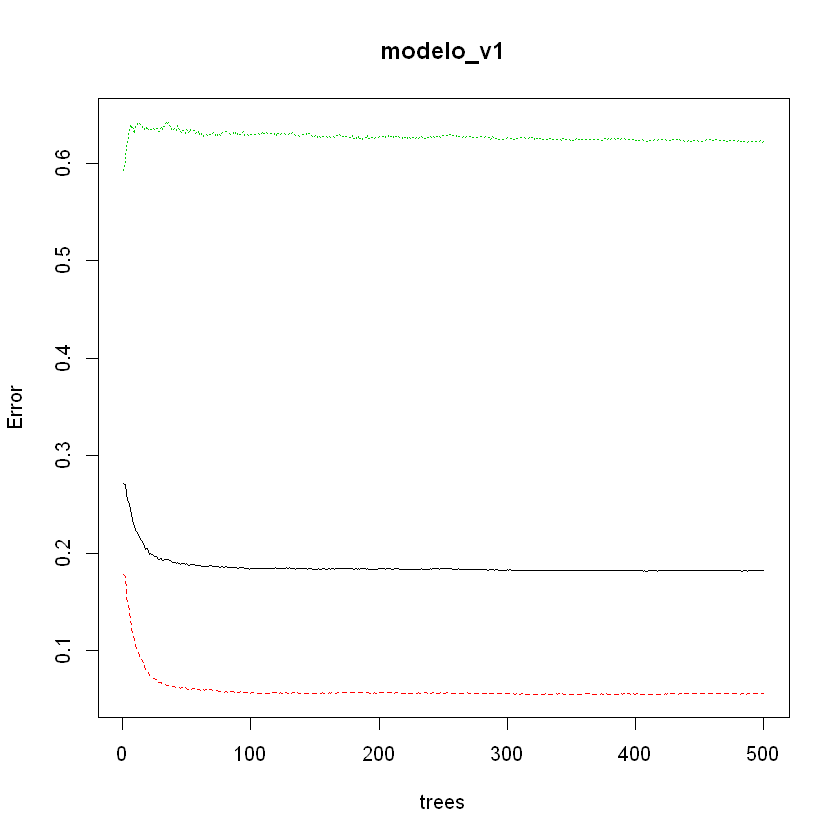

In [42]:
# Avaliação do modelo
plot(modelo_v1)

In [43]:
previsoes_v1 = predict(modelo_v1, data_test)

In [44]:
#Confusion Matrix
cm_v1 = caret::confusionMatrix(previsoes_v1, data_test$inadimplente, positive="1")
cm_v1

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5417 1046
         1  344  606
                                          
               Accuracy : 0.8125          
                 95% CI : (0.8034, 0.8213)
    No Information Rate : 0.7771          
    P-Value [Acc > NIR] : 4.86e-14        
                                          
                  Kappa : 0.362           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.36683         
            Specificity : 0.94029         
         Pos Pred Value : 0.63789         
         Neg Pred Value : 0.83816         
             Prevalence : 0.22285         
         Detection Rate : 0.08175         
   Detection Prevalence : 0.12815         
      Balanced Accuracy : 0.65356         
                                          
       'Positive' Class : 1               
                        

In [45]:
# Calculando Precision, Recall e F1-Score
y = data_test$inadimplente
y_pred_v1 = previsoes_v1

precision = posPredValue(y_pred_v1, y)
precision

recall = sensitivity(y_pred_v1, y)
recall

F1 = (2*precision * recall)/(precision+recall)
F1

[1] 0.8381557

[1] 0.9402881

[1] 0.8862893

In [49]:
# Melhoria das métricas para o modelo 
## Balanceamento dos dados: SMOTE -> Synthetic Minority Oversampling Technique. Aumento dos registros da classe 1
# install.packages("DMWR")
library(DMWR)

ERROR: Error in library(DMWR): there is no package called 'DMWR'


In [47]:
install.packages('abind')
install.packages('zoo')
install.packages('xts')
install.packages('quantmod')
install.packages('ROCR')
install.packages("DMwR")

package 'abind' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\Rtmpsj1sAx\downloaded_packages
package 'zoo' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\Rtmpsj1sAx\downloaded_packages
package 'xts' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\Rtmpsj1sAx\downloaded_packages
package 'quantmod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\Rtmpsj1sAx\downloaded_packages
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\Rtmpsj1sAx\downloaded_packages


Warning message:
"package 'DMwR' is not available (for R version 3.6.1)"

In [47]:
table(data_treino$inadimplente)


    0     1 
17284  4958 

In [48]:
data_treino_bal = SMOTE(inadimplement ~., data=data_treino)

ERROR: Error in SMOTE(inadimplement ~ ., data = data_treino): não foi possível encontrar a função "SMOTE"
